# Welcome to our Notebook for Real / Fake Job Postings # 

By Dina Bishr 900181303 
Mariam Daabis 900192265

## Importing needed Libraries ##

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
#Loading dataset 
df1 = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')
df1.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Data Exploration ## 

In [3]:
df1.shape

(17880, 18)

In [4]:
df1.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [5]:
#check for null values to see which columns can be dropped
df1.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

For now, we can fill the NULL values with blank strings or a "Unknown" category for the categorical columns.

For the text non-categorical columns, we'll just fill with an empty string '', to facilitate the NLP steps later on.

In [6]:
nan_variable = 'Unknown' # Edit this to select how to replace NaNs

df1['location'] = df1['location'].fillna(nan_variable)
df1['department'] = df1['department'].fillna(nan_variable)
df1['employment_type'] = df1['employment_type'].fillna(nan_variable)
df1['required_experience'] = df1['required_experience'].fillna(nan_variable)
df1['required_education'] = df1['required_education'].fillna(nan_variable)
df1['industry'] = df1['industry'].fillna(nan_variable)
df1['function'] = df1['function'].fillna(nan_variable)

df1['benefits'] = df1['benefits'].fillna('')
df1['company_profile'] = df1['company_profile'].fillna('')
df1['requirements'] = df1['requirements'].fillna('')
df1['description'] = df1['description'].fillna('')

In [7]:
df1.isnull().sum()

job_id                     0
title                      0
location                   0
department                 0
salary_range           15012
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                   0
function                   0
fraudulent                 0
dtype: int64

## Heatmap of Continuous Variable Correlation ## 

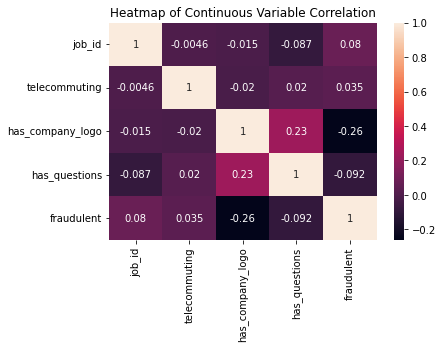

In [8]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Heatmap of Continuous Variable Correlation')
plt.show()

In [9]:
df=df1
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
df.shape

(17880, 18)

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [12]:
import tensorflow as tf
tf.__version__

'2.8.0'

#NLP

##clean strings

In [13]:
import re
import string

In [14]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
df['benefits_cleaned'] = df['benefits'].apply(clean_text)
df['company_profile_cleaned'] = df['company_profile'].apply(clean_text)
df['requirements_cleaned'] = df['requirements'].apply(clean_text)
df['description_cleaned'] = df['description'].apply(clean_text)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type,required_experience,required_education,industry,function,fraudulent,benefits_cleaned,company_profile_cleaned,requirements_cleaned,description_cleaned
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,...,Other,Internship,Unknown,Unknown,Marketing,0,,were and weve created a groundbreaking and aw...,experience with content management systems a m...,a fastgrowing james beard awardwinning online...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,what you will get from usthrough being part of...,seconds the worlds cloud video production se...,what we expect from youyour key responsibility...,organised focused vibrant awesomedo you hav...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,0,,valor services provides workforce solutions th...,implement precommissioning and commissioning p...,our client located in houston is actively seek...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,our culture is anything but corporate—we have ...,our passion for improving quality of life thro...,education bachelor’s or master’s in gis busine...,the company esri – environmental systems resea...
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,full benefits offered,spotsource solutions llc is a global human cap...,qualificationsrn license in the state of texas...,job title itemization review managerlocation f...


##concatinate all our data into one column 'text_cleaned'

In [16]:
df['text_cleaned'] = df['benefits_cleaned'] + ' ' + df['company_profile_cleaned'] + ' ' + df['requirements_cleaned'] + ' ' + df['description_cleaned']

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,benefits_cleaned,company_profile_cleaned,requirements_cleaned,description_cleaned,text_cleaned
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,...,Internship,Unknown,Unknown,Marketing,0,,were and weve created a groundbreaking and aw...,experience with content management systems a m...,a fastgrowing james beard awardwinning online...,were and weve created a groundbreaking and a...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,what you will get from usthrough being part of...,seconds the worlds cloud video production se...,what we expect from youyour key responsibility...,organised focused vibrant awesomedo you hav...,what you will get from usthrough being part of...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,...,Unknown,Unknown,Unknown,Unknown,0,,valor services provides workforce solutions th...,implement precommissioning and commissioning p...,our client located in houston is actively seek...,valor services provides workforce solutions t...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,our culture is anything but corporate—we have ...,our passion for improving quality of life thro...,education bachelor’s or master’s in gis busine...,the company esri – environmental systems resea...,our culture is anything but corporate—we have ...
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,full benefits offered,spotsource solutions llc is a global human cap...,qualificationsrn license in the state of texas...,job title itemization review managerlocation f...,full benefits offered spotsource solutions llc...


## Remove the stopwords 

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = stopwords.words('english')

In [19]:
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [20]:
df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)

# Oversampling 

In [21]:
!sudo pip install imbalanced-learn

In [22]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(imblearn.__version__)

0.8.1


In [23]:
## Get the Independent Features

X = df['text_cleaned']  # Unified column with concatenated strings of text
y = df['fraudulent']# Target is 0 or 1

In [24]:
y.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

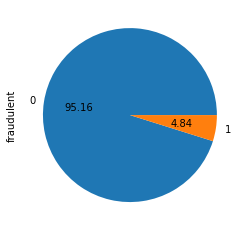

In [25]:
y.value_counts().plot.pie(autopct='%.2f')

In [26]:

oversample = RandomOverSampler(sampling_strategy="not majority") # Oversample Function

X = X.values.reshape(-1, 1) # Convert X into 2D array for oversampling
X, y = oversample.fit_resample(X, y) # Oversample X and y
X = X.reshape(-1) # Flatten X back into 1D array for encodings
print(Counter(y))

Counter({0: 17014, 1: 17014})


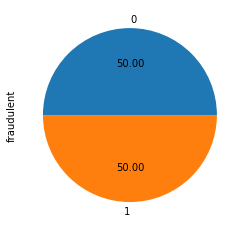

In [27]:
y.value_counts().plot.pie(autopct='%.2f')

# GloVe

In order to proceed with the GloVe (Global Vectors for Word Representation) which is an unsupervised learning algorithm that studies the co-occurences of words, we need to perform tokenization. GloVe is built on the idea that semantic relationships between words can be derived from the co-occurence matrix. 

First, tokenization is converting a sentence into words which is useful because it facilitates the processing by converting the output to numbers. 


## tokenization 

In [28]:
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:


text_ = X
# Calculate the length 
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(text_)

length = len(word_tokenizer.word_index) + 1


length

191475

## Pad sequences 

Next we will use the function *pad_sequences* which will transform a list of sequences into sequences that all have the same length that is the length of the longest sequence. This is done by padding 0 in the beginning of each sequence.





In [30]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [31]:
import numpy as np
longest_train = max(text_, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(text_), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences
# sanity check
np.count_nonzero(train_padded_sentences)

4141242

## Embedding Representation:

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings

with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

In [34]:
# Here we load the embedding vectors of the words that are in the Glove dictionary and intialize the rest to 0 
#until we have our embedding matrix 
embedding_matrix = np.zeros((length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11619   ,  0.45447001, -0.69216001, ..., -0.54737002,
         0.48822001,  0.32246   ],
       [-0.030315  ,  0.53763998,  0.38414001, ..., -0.58228999,
         0.32931   ,  0.64103001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# LSTM Model

In [35]:
#importing the needed libraries 
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)

In [ ]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        100, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1419, 100)         19147500  
                                                                 
 bidirectional (Bidirectiona  (None, 1419, 200)        160800    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                        

In [ ]:
y_ =y.values #target variable

In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    y_, 
    test_size=0.25
)

In [ ]:
# Loading and training the model 
checkpoint = ModelCheckpoint(
     'model.h5', 
     monitor = 'val_loss', 
     verbose = 1, 
     save_best_only = True
 )
reduce_lr = ReduceLROnPlateau(
     monitor = 'val_loss', 
     factor = 0.2, 
     verbose = 1, 
     patience = 5,                        
     min_lr = 0.001
 )
hist = model.fit(
    X_train, 
    y_train, 
    epochs = 3,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/3
210/210 [==============================] - ETA: 0s - loss: 0.1376 - accuracy: 0.9530
Epoch 1: val_loss improved from inf to 0.10662, saving model to model.h5
210/210 [==============================] - 1497s 7s/step - loss: 0.1376 - accuracy: 0.9530 - val_loss: 0.1066 - val_accuracy: 0.9591 - lr: 0.0010
Epoch 2/3
210/210 [==============================] - ETA: 0s - loss: 0.1130 - accuracy: 0.9604
Epoch 2: val_loss improved from 0.10662 to 0.09456, saving model to model.h5
210/210 [==============================] - 1506s 7s/step - loss: 0.1130 - accuracy: 0.9604 - val_loss: 0.0946 - val_accuracy: 0.9680 - lr: 0.0010
Epoch 3/3
210/210 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9695
Epoch 3: val_loss improved from 0.09456 to 0.08427, saving model to model.h5
210/210 [==============================] - 1512s 7s/step - loss: 0.0875 - accuracy: 0.9695 - val_loss: 0.0843 - val_accuracy: 0.9747 - lr: 0.0010


## Model Performance and Accuracy:

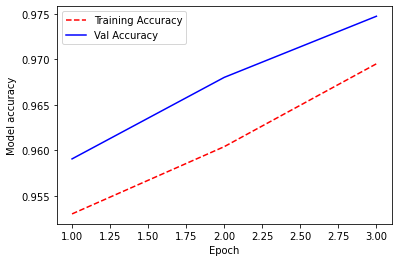

In [ ]:
# from mlxtend.plotting import plot_learning_curves
# #X_train, X_test, y_train, y_test
# plot_learning_curves(X_train,y_train,X_test,y_test,model)

# Get training and validation accuracy histories
training_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
EPOCHS= 3 
# Create count of the number of epochs
epoch_count = range(1, EPOCHS + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Model accuracy')
plt.show()


## Saving model weights ## 

In [43]:
import pickle



#Saving
filename = 'weights.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://4c71e5ef-0b71-4557-80e2-2b355320312f/assets


## Predicting model accuracy ## 

In [44]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [52]:
#y_pred=model.predict(X_test)

## Confusion matrix ## 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

## Accuracy score ## 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

## Classification report ## 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Load model weights for live Demo

In [37]:
#Loading the biLSTM trained model (our model)
import pickle

model = pickle.load(open("/content/drive/MyDrive/weights.sav", 'rb'))

In [74]:
#Demo 
import pandas as pd

real_job = ['My team is expanding! Dell Technologies is hiring for Frontend and Backend positions. If you want to be part of a team that shapes the future, working with cutting edge technologies, dont hesitate to apply.']

test = pd.DataFrame (real_job, columns = ['test'])

#test = df['text_cleaned']
test.apply(clean_text)
word_tokenizer.fit_on_texts(test)
length = len(word_tokenizer.word_index) + 1
embedding_dim = 100

import numpy as np
longest_train = max(test, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(test.iloc[0]['test']), 
    1419, 
    padding='post'
)

#train_padded_sentences
# sanity check
np.count_nonzero(train_padded_sentences)
y_pred = np.argmax(model.predict(train_padded_sentences), axis=-1)
if(y_pred.all()):
  print("This job post is fake")
else:
  print("This job post is real")

##  1 is fake 0 is real 


This job post is real
